In [1]:
# Dependencies

import gmaps
import numpy as np
import pandas as pd
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress
from matplotlib import pyplot as plt
from config import (gkey)

In [2]:
walkscore_map = pd.read_csv('Resources/walkscore_mapping.csv')
property_dataset = pd.read_csv('Resources/clean_property_value.csv')

In [3]:
walkscore_map.head()

ZipCode        Lat         Lng  walk score  bike score
0    94567  38.684420 -122.469369           0        12.0
1    95554  40.267691 -123.782328           0         NaN
2    96061  40.369619 -121.468470           0         NaN
3    96113  40.146205 -120.117066           0        17.0
4    95571  40.332271 -123.911152           0        27.0

In [4]:
property_dataset.head()

RegionName RegionType StateName State             City  \
0       94567        Zip        CA    CA      Pope Valley   
1       95762        Zip        CA    CA  El Dorado Hills   
2       92555        Zip        CA    CA    Moreno Valley   
3       95554        Zip        CA    CA       Myers Flat   
4       94549        Zip        CA    CA        Lafayette   

                                 Metro           CountyName    1/31/14  \
0                                 Napa          Napa County   341561.0   
1  Sacramento--Roseville--Arden-Arcade     El Dorado County   347207.0   
2     Riverside-San Bernardino-Ontario     Riverside County   364672.0   
3                Eureka-Arcata-Fortuna      Humboldt County   412021.0   
4        San Francisco-Oakland-Hayward  Contra Costa County  1034925.0   

   2/28/21  3/31/21  Bdrm      CAGR        Lat         Lng  
0   343077   343655     2  0.613068  38.684420 -122.469369  
1   346318   353654     1  1.856817  38.657591 -121.056443  
2   369914   372444     1  2.131230  33.920685 -117.114710  
3   424761   422492     3  2.541375  40.267691 -123.782328  
4  1073843  1063895     1  2.799237  37.892946 -122.117826

In [5]:
#finding correlation between property value increase between 3 different house types in the same zip code

In [6]:
# finding correlation between property value increase and walk-score

In [7]:
## rename region name to zip code, so that we can merge both datasets
property_dataset = property_dataset.rename(columns={'RegionName': 'ZipCode'})

In [8]:
## remove lat and long from the walkscore dataframe
walkscore_map = walkscore_map[['ZipCode','walk score','bike score']]

In [9]:
## merge the two datasets together
result = pd.merge(property_dataset, walkscore_map, on="ZipCode")
result.head()


ZipCode RegionType StateName State             City  \
0    94567        Zip        CA    CA      Pope Valley   
1    95762        Zip        CA    CA  El Dorado Hills   
2    95762        Zip        CA    CA  El Dorado Hills   
3    95762        Zip        CA    CA  El Dorado Hills   
4    92555        Zip        CA    CA    Moreno Valley   

                                 Metro        CountyName   1/31/14  2/28/21  \
0                                 Napa       Napa County  341561.0   343077   
1  Sacramento--Roseville--Arden-Arcade  El Dorado County  347207.0   346318   
2  Sacramento--Roseville--Arden-Arcade  El Dorado County  405368.0   574642   
3  Sacramento--Roseville--Arden-Arcade  El Dorado County  455169.0   660087   
4     Riverside-San Bernardino-Ontario  Riverside County  364672.0   369914   

   3/31/21  Bdrm       CAGR        Lat         Lng  walk score  bike score  
0   343655     2   0.613068  38.684420 -122.469369           0        12.0  
1   353654     1   1.856817  38.657591 -121.056443           1         8.0  
2   583437     2  43.927740  34.280197 -118.498074           1         8.0  
3   671106     3  47.441060  38.657591 -121.056443           1         8.0  
4   372444     1   2.131230  33.920685 -117.114710           5         7.0

In [10]:
## remove null values in either CAGR, walk score or bike score
result = result.dropna()
len(result)

3368

In [11]:
# separating the zip codes by bedroom numbers
bedr_one = result.loc[result['Bdrm']==1]
bedr_two = result.loc[result['Bdrm']==2]
bedr_three = result.loc[result['Bdrm']==3]

The r-squared is : -0.0
y = -0.0x + 33.14


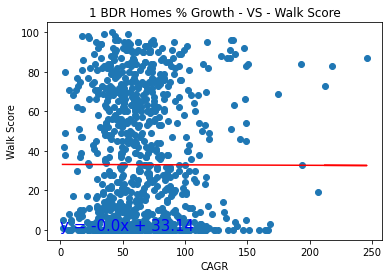

In [12]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and walk-score

x_values = bedr_one['CAGR']
y_values = bedr_one['walk score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Walk Score')
plt.xlabel('CAGR')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.0
y = -0.0x + 33.35


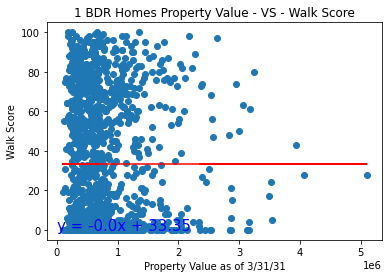

In [13]:
# finding correlation between property value and walk-score
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and walk-score

x_values = bedr_three['3/31/21']
y_values = bedr_three['walk score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes Property Value - VS - Walk Score')
plt.xlabel('Property Value as of 3/31/31')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : 0.04
y = 0.03x + 36.05


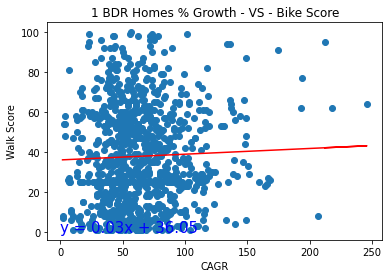

In [14]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = bedr_one['CAGR']
y_values = bedr_one['bike score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Bike Score')
plt.xlabel('CAGR')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

The r-squared is : -0.01
y = -0.0x + 38.55


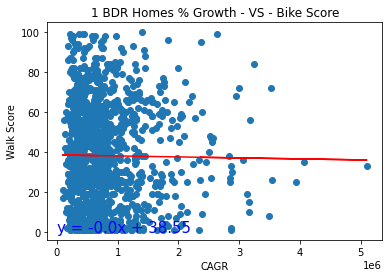

In [15]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = bedr_three['3/31/21']
y_values = bedr_three['bike score']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - Bike Score')
plt.xlabel('CAGR')
plt.ylabel('Walk Score')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [16]:
# NO CORRELATION BETWEEN PROPERTY VALUE OR PROPERTY GROWTH - VS - WALK-SCORE
# NO CORRELATION BETWEEN PROPERTY VALUE OR PROPERTY GROWTH - VS - BIKE-SCORE

In [17]:
# linear regression between CAGR for 1 bedr and 2 bedr

## replace column name for bedr two
bedr_two_fix = bedr_two.rename(columns={'CAGR': 'CAGR_Two','3/31/21': '3/31/21_Two'})

## find the zipcodes that match by mergind the two datasets
one_two_bdr = pd.merge(bedr_one, bedr_two_fix, on="ZipCode")

The r-squared is : 0.58
y = 0.5x + 34.1


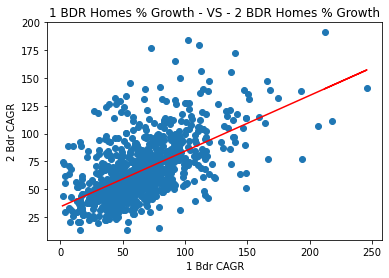

In [18]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = one_two_bdr['CAGR']
y_values = one_two_bdr['CAGR_Two']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - 2 BDR Homes % Growth')
plt.xlabel('1 Bdr CAGR')
plt.ylabel('2 Bdr CAGR')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [19]:
# linear regression between CAGR for 1 bedr and 3 bedr

## replace column name for bedr two
bedr_three_fix = bedr_three.rename(columns={'CAGR': 'CAGR_Three','3/31/21': '3/31/21_Three'})

## find the zipcodes that match by mergind the two datasets
one_three_bdr = pd.merge(bedr_one, bedr_three_fix, on="ZipCode")

The r-squared is : 0.4
y = 0.31x + 42.91


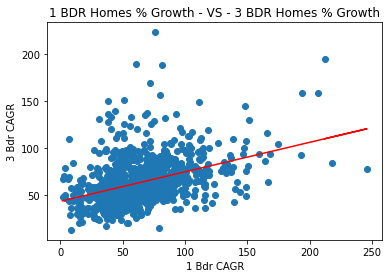

In [20]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = one_three_bdr['CAGR']
y_values = one_three_bdr['CAGR_Three']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('1 BDR Homes % Growth - VS - 3 BDR Homes % Growth')
plt.xlabel('1 Bdr CAGR')
plt.ylabel('3 Bdr CAGR')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()

In [21]:
# linear regression between CAGR for 2 bedr and 3 bedr

## replace column name for bedr two
bedr_three_fix = bedr_three.rename(columns={'CAGR': 'CAGR_Three','3/31/21': '3/31/21_Three'})

## find the zipcodes that match by mergind the two datasets
two_three_bdr = pd.merge(bedr_two, bedr_three_fix, on="ZipCode")

The r-squared is : 0.66
y = 0.58x + 24.52


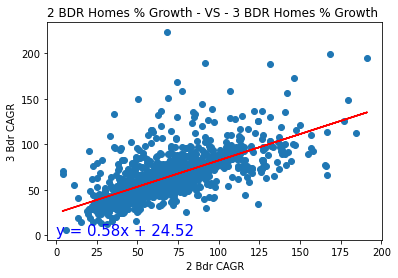

In [22]:
#plotting linear regression model to find correlation between CAGR for houses with one bedroom and bike score

x_values = two_three_bdr['CAGR']
y_values = two_three_bdr['CAGR_Three']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regression_values = x_values * slope + intercept
line_regression = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_regression,(0,0),fontsize=15,color="blue")
plt.title('2 BDR Homes % Growth - VS - 3 BDR Homes % Growth ')
plt.xlabel('2 Bdr CAGR')
plt.ylabel('3 Bdr CAGR')
# plt.savefig("output_data/Northern Hemisphere - Temperature vs. Latitude Linear Regression.png")
print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
print(line_regression)

plt.show()